In [ ]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
p=Path('/content/drive/MyDrive/animals')
dirs=p.glob("*")

image_data=[]
labels=[]

label_dict={}
label_to_animals={}
counter=0
for i in dirs:
    label=str(i).split("\\")[-1]
    label_dict[label]=counter
    label_to_animals[counter]=label
    
    print(i)
    count=0
    
    for img_path in i.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(108,108))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(counter)
        count +=1
        
    print(count)
    counter +=1

/content/drive/MyDrive/animals/panda
1000
/content/drive/MyDrive/animals/cats
1000
/content/drive/MyDrive/animals/dogs
1000


In [ ]:
import numpy as np

In [ ]:
X=np.array(image_data)
Y=np.array(labels)

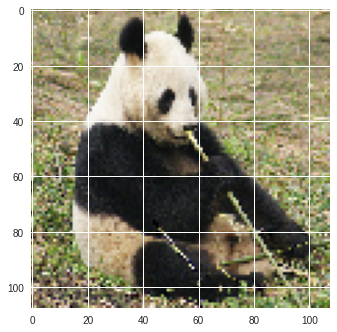

In [ ]:
plt.imshow(X[0]/255)

In [ ]:
def drawimage(image,label):
    plt.style.use('seaborn')
    plt.title(label_to_animals[label])
    plt.imshow(image)
    plt.show()

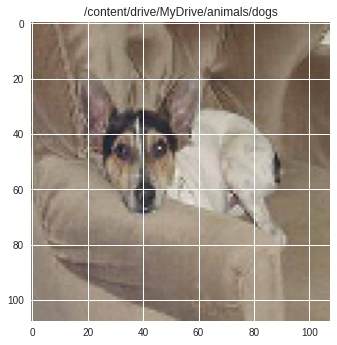

In [ ]:
drawimage(X[2400]/255,Y[2400])


In [ ]:
import random
random.seed(10)

In [ ]:
#Shuffle our data
from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)

#Normalisation
X = X/255.0

In [ ]:
### Create Training and Testing Set
X_ = np.array(X)
Y_ = np.array(Y)

#Training Set
X = X_[:2400,:]
Y = Y_[:2400]

#Test Set
XTest = X_[2400:,:]
YTest = Y_[2400:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)

(2400, 108, 108, 3) (2400,)
(600, 108, 108, 3) (600,)


In [ ]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third Layer
        model['W3'] = np.random.randn(layers[1],layers[2])
        model['b3'] = np.zeros((1,layers[2]))
        
        #Output Layer
        model['W4'] = np.random.randn(layers[2],output_size)
        model['b4'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3,W4 = self.model['W1'],self.model['W2'],self.model['W3'],self.model['W4']
        b1, b2, b3,b4 = self.model['b1'],self.model['b2'],self.model['b3'],self.model['b4']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        a3 = np.tanh(z3)
        
        z4 = np.dot(a3,W4) + b4
        y_ = softmax(z4)
        
        self.activation_outputs = (a1,a2,a3,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3,W4 = self.model['W1'],self.model['W2'],self.model['W3'],self.model['W4']
        b1, b2, b3,b4 = self.model['b1'],self.model['b2'],self.model['b3'],self.model['b4']
        m = x.shape[0]
        
        a1,a2,a3,y_ = self.activation_outputs
        
        delta4 = y_ - y
        dw4 = np.dot(a3.T,delta4)
        db4 = np.sum(delta4,axis=0)
        
        delta3 = (1-np.square(a3))*np.dot(delta4,W4.T)
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        self.model["W4"]  -= learning_rate*dw4
        self.model['b4']  -= learning_rate*db4
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3,W4 = self.model['W1'],self.model['W2'],self.model['W3'],self.model['W4']
        a1,a2,a3,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans    

In [ ]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [ ]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 3
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
            
    
    return training_loss

In [ ]:
model = NeuralNetwork(input_size=34992,layers=[200,50,20],output_size=3)

In [ ]:
X = X.reshape(X.shape[0],-1)
print(X.shape)

XTest = XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

(2400, 34992)
(600, 34992)


In [ ]:
l = train(X,Y,model,1000,0.0005)

Epoch 0 Loss 1.0672
Epoch 50 Loss 0.3656
Epoch 100 Loss 0.3253
Epoch 150 Loss 0.2832
Epoch 200 Loss 0.2509
Epoch 250 Loss 0.2509
Epoch 300 Loss 0.2422
Epoch 350 Loss 0.2153
Epoch 400 Loss 0.2169
Epoch 450 Loss 0.1968
Epoch 500 Loss 0.2079
Epoch 550 Loss 0.1845
Epoch 600 Loss 0.1942
Epoch 650 Loss 0.2160
Epoch 700 Loss 0.1701
Epoch 750 Loss 0.1533
Epoch 800 Loss 0.1647
Epoch 850 Loss 0.1576
Epoch 900 Loss 0.1682
Epoch 950 Loss 0.2114


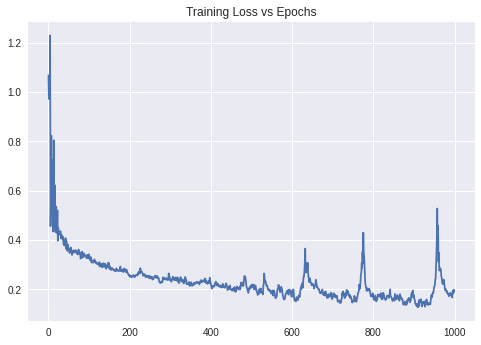

In [ ]:
import matplotlib.pyplot as plt
#plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)

plt.show()

In [ ]:
# Accuracy 
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Accuracy: %.4f  :)"%getAccuracy(X,Y,model))
print("Test Accuracy: %.4f :("%getAccuracy(XTest,YTest,model))

Train Accuracy: 0.7388  :)
Test Accuracy: 0.5250 :(


In [ ]:
print('Enter the image path: ')
img_path=input()

img = image.load_img(img_path,target_size=(108,108))
img = image.img_to_array(img)
print(img.shape)
img= img.reshape(1,-1)

y=model.predict(img)
for i in label_to_animals.keys():
    print(i)
    if i==y:
        print(label_to_animals[i])
        break

Enter the image path: 
/content/drive/MyDrive/animals/panda/panda_00001.jpg
(108, 108, 3)
0
/content/drive/MyDrive/animals/panda
